<a href="https://colab.research.google.com/github/yeb2Binfang/ECE-GY-6233-optimization/blob/main/HW/GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coding Problem
<br>
Consider the following unconstrained minimization problem
$$
\min_{x\in R^3} f(x) = \frac{1}{2}x^T Ax + x^T b
$$
where $A$ and $b$ are defined as
$$
A = \begin{bmatrix}
2 & -1 & 0\\
-1 & 2 & -1\\
0 & -1 & 2
\end{bmatrix}
\qquad 
b = \begin{bmatrix}
1\\ 1\\ 1
\end{bmatrix}
$$

<br>



1. Determine whether the matrix $A$ is positive definite and find the minimum of $f$​​ if exists.

2. Implement the gradient descent method with backtracking line search starting with $x_0=[1,1,1]^T$. Let the maximum iteration number be $50$, $\alpha=0.25$ and $\beta=0.1$. Record the function value of each iteration and plot it (x-axis: number of iterations / y-axis: function value of that iteration). </br>

In [1]:
def obj(x,A,b):
  f = 0.5 * x.T.dot(A).dot(x)+b.T.dot(x)
  return f

def obj_grad(x,A,b):
  f_grad = A.dot(x) + b
  return f_grad

The backtracking line search

if 

$$
f(x+t\triangle x)>f(x)+\alpha t \triangledown f(x)^T \triangle x
$$

then we need to update $t$, $t=\beta \times t$




In [3]:
# Code goes here

def backtracking(x, A, b, alpha, beta, t, maxIter):
  val = []
  it = 1
  while it<=maxIter:
    it+=1
    grad = obj_grad(x, A, b)
    delta_x = -grad
    left = obj(x + t * delta_x, A, b)
    right = obj(x, A, b) + alpha * t * grad.T.dot(delta_x)
    #print(grad.T.dot(grad))
    while left > right:
      t = beta * t   
      left = obj(x + t*delta_x, A, b)
      right = obj(x, A, b) + alpha * t * grad.T.dot(delta_x)
    x = x - t*grad
    val.append(obj(x,A, b))
  return val


In [4]:
import numpy as np
A = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
b = np.ones(3)
alpha = 0.25
beta = 0.1
t=1
x=np.ones(3)
maxIter = 50
val = backtracking(x, A, b, alpha, beta, t, maxIter)

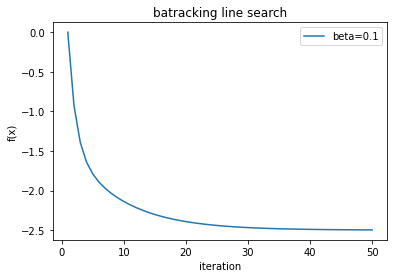

In [5]:
# Plot the function value each iteration
import matplotlib.pyplot as plt
x_axis = np.arange(1,51,1)
plt.plot(x_axis,val)
plt.xlabel("iteration")
plt.ylabel("f(x)")
plt.title("batracking line search")
plt.legend(['beta=0.1'])


3. Change the learning rate to $\beta=0.3$ and $\beta=0.8$, repeate the process in (2) and plot the function values. Comment on how the learning rate will affect the gradient descent method.

In [6]:
# Code goes here
A = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
alpha = 0.25
beta_1 = 0.3
beta_2 = 0.8
t=1
x=np.ones(3)
maxIter = 50
val_1 = backtracking(x, A, b, alpha, beta_1, t, maxIter)
val_2 = backtracking(x, A, b, alpha, beta_2, t, maxIter)


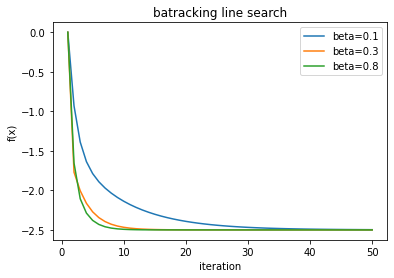

In [7]:
# Plot the function value each iteration (for different beta)
x_axis = np.arange(1,51,1)
plt.plot(x_axis,val)
plt.plot(x_axis,val_1)
plt.plot(x_axis,val_2)
plt.xlabel("iteration")
plt.ylabel("f(x)")
plt.title("batracking line search")
plt.legend(['beta=0.1','beta=0.3','beta=0.8'])